# Flow
Show the reader volumes or intensity of movement between two or more states or conditions. These might be logical sequences or geographical locations

In [1]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Sankey

Shows changes in flows from one condition to at least one other; good for tracing the eventual outcome of a complex process.

## Waterfall

Designed to show the sequencing of data through a flow process, typically budgets. Can include +/- components

In [21]:
df = pd.DataFrame({'variable':['Revenue','Other','Sales Expense','R&D','Other Income','Profit'],
                   'kind':['net','out','out','out','in','net'],
                   'value':[4000,-400,-2000,-600,100,1100]})
df

,variable,kind,value
0,Revenue,net,4000
1,Other,out,-400
2,Sales Expense,out,-2000
3,R&D,out,-600
4,Other Income,in,100
5,Profit,net,1100


In [28]:
#order cats
ordered_cats = df['variable']
df['variable'] = pd.Categorical(df['variable'], categories=ordered_cats, ordered=True)
#create the water fall
df['start'] = 0
df['end'] = 0
df['id'] = range(1,df.shape[0]+1)
for i in range(df.shape[0]):
    if df.iloc[i,1]=='net':
        df.iloc[i,4] = df.iloc[i,2] #set end
    else:
        df.iloc[i,3] = df.iloc[i-1,4] #set start equals to previous end
        df.iloc[i,4] = df.iloc[i,3] + df.iloc[i,2] #set end equals to start + value
df

,variable,kind,value,start,end,id
0,Revenue,net,4000,0,4000,1
1,Other,out,-400,4000,3600,2
2,Sales Expense,out,-2000,3600,1600,3
3,R&D,out,-600,1600,1000,4
4,Other Income,in,100,1000,1100,5
5,Profit,net,1100,0,1100,6


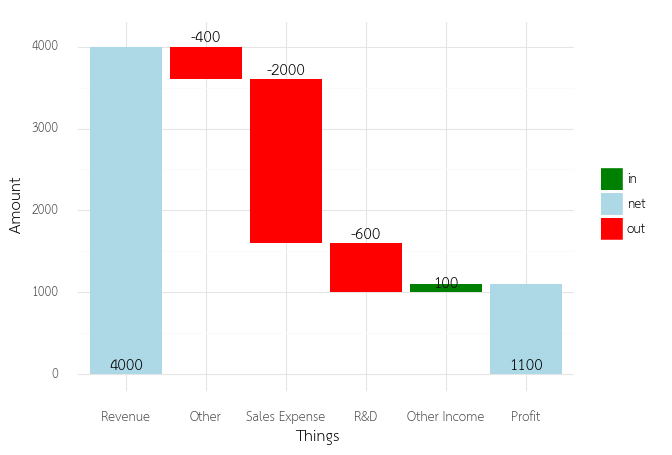

<ggplot: (-9223363242664415800)>

In [43]:
g = (ggplot(df,aes(fill='kind')) +
     #draw rectangles
     geom_rect(aes(x='variable',xmin='id-0.45',xmax='id+0.45',
              ymin='end',ymax='start')) +
     geom_text(aes(x='variable',y='start+100',label='value')) +
     scale_fill_manual(values=['green','lightblue','red']) +
     xlab('Things') + ylab('Amount') +
     theme(legend_title=element_blank())
    )
g

## Chord
A complex but powerful diagram which can illustrate 2-way flows (and net winner) in a matrix

## Network

Used for showing the complexity and inter-connectdness of relationships of varying types.